In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [ ]:
ms = np.linspace(0.5, 100,1000)
g = 9.81
def mass_x(h,m):
    alpha = np.sqrt(2*m*g)
    x = lambda t : alpha**2/g*np.log(np.cos(-g*t/alpha))
    t = np.linspace(0,1,10000)
    inv_x = interp1d(-x(t),t,kind='linear',bounds_error=False)
    return float(inv_x(h)),alpha

In [ ]:
float(np.nan)

In [ ]:
mass_x(0.7,1)

In [ ]:
vec_mass = np.vectorize(mass_x)
# mass_x(0.7,1)

In [ ]:
ts,alphas = vec_mass(0.7,ms)

In [ ]:
vs = alphas*np.tan(-g*ts/alphas)

In [ ]:
plt.plot(ms,vs**2)

In [ ]:
N = 10
Aij = np.ones((N,N)) - np.eye(N)
Bijk = np.ones((N,N,N))
Bij,Bjk,Bki = np.where(Bijk)

In [ ]:
len(set((1,1,1)))

# chimera state

In [31]:
from numba import jit
import numpy as np
import matplotlib.pyplot as plt
# @jit(nopython=True)
def make_Bijk(N):
    Bijk = np.ones((N,N,N)) - np.eye(N)
    for i in range(N): Bijk[i,i,:]=0;Bijk[i,:,i]=0
    return Bijk

In [32]:
N = 50
Aij = np.ones((N,N)) - np.eye(N)
Bijk = make_Bijk(N)


In [33]:
def Kuramoto_SOL_CHIMERA(Theta,t,omega,N,eps1,eps2,beta):
    # print("Case m = 0")
    theta = Theta.copy()
    # theta_i,theta_j = np.meshgrid(theta,theta,sparse=False,indexing='ij')
    i,j,k = np.meshgrid(theta,theta,theta,sparse=False,indexing='ij')
    # theta_i,theta_j = np.meshgrid(theta,theta,sparse=True)
    dtheta = omega + eps2/N**2*np.sum(np.sum(np.sin(j+k-2*i-beta),axis=2),axis=1)
    return dtheta

In [34]:
# i,j,k = np.meshgrid([0,1,2],[0,1,2],[0,1,2],sparse=False,indexing='ij')
i,j = np.meshgrid([0,1,2],[0,1,2],sparse=False,indexing='ij')

In [35]:
t = np.arange(0,10,0.1)
Theta = np.random.uniform(0,2*np.pi,N)

In [36]:
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

In [37]:
t = np.arange(0,100,0.1)
Theta = np.random.uniform(0,2*np.pi,N)

In [38]:
sol = RK4(Kuramoto_SOL_CHIMERA,Theta,t,args=(1,N,1,2,0))

In [39]:
N

50

(array([41.,  7.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.42230142, 1.42230142, 1.42230142, 1.42230142, 1.42230142,
        1.42230142, 1.42230142, 1.42230142, 1.42230142, 1.42230142,
        1.42230142]),
 <BarContainer object of 10 artists>)

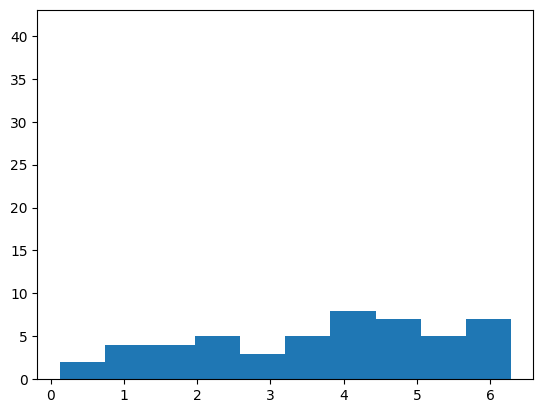

In [40]:
plt.hist(sol[0])
plt.hist(sol[-1]%(np.pi))

In [41]:
np.sum(Aij,axis=0)

array([49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49.,
       49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49.,
       49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49.,
       49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49.])

In [42]:
# idx =-1
# theta_i,theta_j,theta_k = np.meshgrid(sol[idx],sol[idx],sol[idx])
# A = np.sum(np.sum(Bijk*np.exp(1j*theta_j+1j*theta_k),axis=2),axis=1)/N**2

In [43]:
rabs = np.abs(np)

TypeError: bad operand type for abs(): 'module'

In [ ]:
plt.plot(R1i)

In [ ]:
rabs = np.mean(np.exp(2*sol.T*1j),axis=0)
# rabs = rabs_[len(t)//2:]
r = np.abs(rabs)


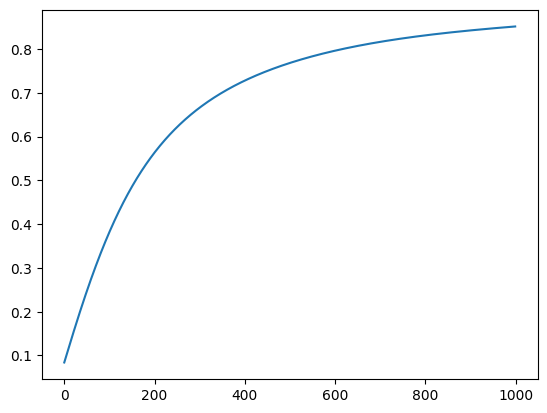

In [44]:
plt.plot(r)

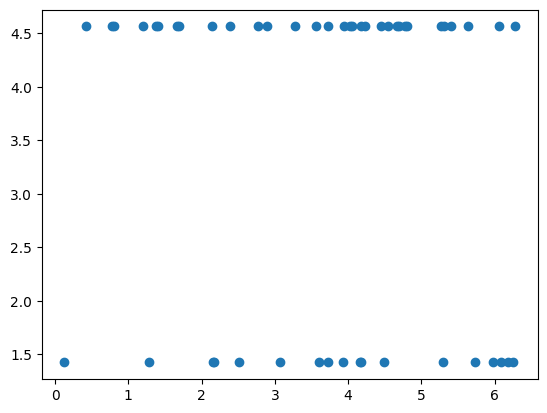

In [45]:
plt.scatter(sol[0],np.sort(sol[-1]%(np.pi*2)))
# plt.plot(sol[-1]%(2*np.pi),'.')

In [ ]:
sol[0].shape

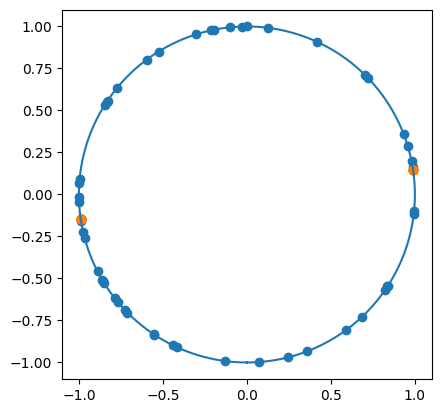

In [47]:
x = np.linspace(-np.pi,np.pi,1000)
plt.axes().set_aspect(1)
idx= 0;plt.scatter(np.sin(sol[idx]),np.cos(sol[idx]))
idx= -1;plt.scatter(np.sin(sol[idx]),np.cos(sol[idx]))
# idx= 110;plt.scatter(np.sin(sol[-idx]),np.cos(sol[-idx]))
plt.plot(np.sin(x),np.cos(x))

In [ ]:
plt.plot(r)
# plt.xlim(0,10)

# 2pi symetric을 어떻게 할지 고민중

In [ ]:
R1i  = 

In [ ]:
N = 3
i = np.arange(N)
# i,j,k= np.meshgrid(i,i,i)
i,j,k= np.meshgrid(i,i,i,indexing='ij',sparse=True)

In [ ]:
BBB = j+k-2*i
Bi,Bj,Bk = np.where(BBB==0)

In [ ]:
Bi += 1
Bj += 1
Bk += 1

In [ ]:
Bi,Bj,Bk

In [ ]:
j[0,:,0]

In [ ]:
import cv2
import numpy as np

In [ ]:
image = cv2.imread('Pasted image 20240321141711.png')

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blurred = cv2.GaussianBlur(gray, (7, 7), 0)


In [ ]:
circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)


In [ ]:

src1_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
dst1 = cv2.inRange(image, (95, 92, 252),(114, 98, 251))#, (150, 150, 255)) # B : 0 ~ 150, G : 0 ~ 150, R : 100 ~ 255
 
dst2 = cv2.inRange(src1_hsv, (160, 200, 0), (179, 255, 255)) # H(색상) : 160 ~ 179, S(채도) : 100 ~ 255, V

In [ ]:
lower_red = (95, 92, 250)
upper_red = (114, 98, 251)
mask = cv2.inRange(image, lower_red, upper_red)

result = cv2.bitwise_and(image, image, mask=mask)

cv2.imshow("Result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
np.where(dst1==1)

In [ ]:

# cv2.imshow('src1', src1)
# cv2.imshow('dst1', dst1)
# cv2.imshow('dst2', dst2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

a = 0.1
def myFun(u,t=0,a=a):
	x,y = u[0],u[1]
	dx = -y+a*x*(x**2+y**2)
	dy = x+ a*y*(x**2+y**2)
	return np.array([dx,dy])

def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y


t = np.arange(0,200,0.01)
x = 0.2* np.linspace(-1.2,1.2,2)
y = 0.2* np.linspace(-1.2,1.2,2)
X,Y = np.meshgrid(x,y)
# u0s = [[-1,0],[-0.2,0],[-0.5,-1],[0,1]]
u0s = [[x_,y_] for x_,y_ in zip(X.flatten(),Y.flatten()) ]
for u0 in u0s:
	u = RK4(myFun,np.array(u0,dtype=float),t,args=(a,))
	plt.plot(u[:,0],u[:,1],lw=1.5,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))

x = np.linspace(-2,2,15)
y = np.linspace(-2,2,15)
X,Y = np.meshgrid(x,y)
U,V = myFun([X,Y],0)
M = (np.hypot(U,V))
# U = U / np.sqrt(U**2 + V**2);
# V = V / np.sqrt(U**2 + V**2);


xs = np.linspace(-3,-1e-5,1000)
U = U / np.sqrt(U**2 + V**2);
V = V / np.sqrt(U**2 + V**2);

# plt.axhline(0,color='black')
# plt.plot(xs,-np.log(-xs),color='black')
# plt.plot(x,xdot(x,y))
Q = plt.quiver(x,y,U,V,M,scale=13,pivot='mid',cmap='jet',zorder=3)
plt.colorbar()
plt.xlim(-2,2)
plt.ylim(-2,2)
ax =plt.gca()
ax.grid(True)
ax.minorticks_on()
ax.set_aspect(1)
# plt.plot(-1,0,'o',ms=10,markeredgewidth=2,markerfacecolor='white')
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.title(f'a={a}',fontsize=15)
plt.legend()

# qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$2 \frac{m}{s}$', labelpos='E',
#                    coordinates='figure')

In [ ]:
centers_x =  []
centers_y =  []
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])  # Circle center
        centers_x.append(i[0])
        centers_y.append(i[1])
        # Draw the center of the circle
        # cv2.circle(image, center, 1, (0, 100, 100), 3)
        # Optionally, draw the circumference of the circle
        # cv2.circle(image, center, i[2], (255, 0, 255), 2)


In [ ]:
cv2.imshow('Detected Circles', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
